### Exercise 1 
#### Jeremias Shadbolt, 1900386


In [587]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import pandas as pd

In [557]:
# Import (or in this case, just hardcode) datasets as lists

dataset_a = [5, 8, 7, 6, 7, 8]
dataset_b = [1.3, 2.1, 1.7, 1.1, 1.4, 2.3]
dataset_c = ['y', 'y', 'n', 'y', 'n', 'n']

##### 1. Combine the vectors into a data matrix with 3 columns and 6 rows. From the data matrix
a) print element (3,2). 

b) print the 4th row.

c) create submatrix of 2 last columns and rows 2-5.

d) transpose the data matrix so that it has 6 columns and 3 rows

In [591]:
# Combine vectors
full_dataset = dataset_a + dataset_b + dataset_c

# Validate 
full_dataset

[5, 8, 7, 6, 7, 8, 1.3, 2.1, 1.7, 1.1, 1.4, 2.3, 'y', 'y', 'n', 'y', 'n', 'n']

In [592]:
# Turn full dataset into a NumPy matrix
full_dataset = np.matrix(full_dataset)

# Reshape the matrix to have 3 columns and 6 rows
shape = (3, 6)
full_dataset = full_dataset.reshape(shape)

# Validate
print(f"Matrix:\n{full_dataset}")
print(f"Shape: {full_dataset.shape}")

Matrix:
[['5' '8' '7' '6' '7' '8']
 ['1.3' '2.1' '1.7' '1.1' '1.4' '2.3']
 ['y' 'y' 'n' 'y' 'n' 'n']]
Shape: (3, 6)


In [608]:
# a) Print element (3,2)
element = (2, 3)
print(f"using NumPy function: {full_dataset.item(element)} \nor ")
print(f"using vanilla Python: {full_dataset[element]}")

using NumPy function: y 
or 
using vanilla Python: y


In [598]:
# b) Print the 4th row (count from 0 so index 3)
row = 1
full_dataset[row]

matrix([['1.3', '2.1', '1.7', '1.1', '1.4', '2.3']], dtype='<U32')

In [606]:
# c) Create submatrix of 2 last columns and rows 2-5
# I had a little trouble understanding the assignment's "2 last columns" -part (and couldn't participate in the QA
# session due to work) so the way i understood it was that we want columns 2 and 3 (indexes 1 and 2)
# out of the possible 3 and rows 2 through 5 so indexes 1-5. 

# ASK AT GROUP SESSION: Why does the 1st part of slicing follow the 0-count principle
# but the 2nd part doesn't? I.E why does the counting start at 1 like it's supposed to,
# but end at the ACTUAL row/column? 
submatrix = full_dataset[1:5, -2:] # [rows 2 to 5][columns 2 and 3]
submatrix

matrix([['1.4', '2.3'],
        ['n', 'n']], dtype='<U32')

In [599]:
# d) Transpose

full_dataset_transposed = full_dataset.transpose()
print(f"Matrix before transposing:\n{full_dataset}")
print(f"Shape: {full_dataset.shape}\n")
print(f"Matrix after transpose:\n{full_dataset_transposed}")
print(f"Shape: {full_dataset_transposed.shape}")

Matrix before transposing:
[['5' '8' '7' '6' '7' '8']
 ['1.3' '2.1' '1.7' '1.1' '1.4' '2.3']
 ['y' 'y' 'n' 'y' 'n' 'n']]
Shape: (3, 6)

Matrix after transpose:
[['5' '1.3' 'y']
 ['8' '2.1' 'y']
 ['7' '1.7' 'n']
 ['6' '1.1' 'y']
 ['7' '1.4' 'n']
 ['8' '2.3' 'n']]
Shape: (6, 3)


##### 2. Variables

https://www-nature-com.ezproxy.utu.fi/articles/s41467-020-15524-1

https://link-springer-com.ezproxy.utu.fi/article/10.1007/s12350-018-1304-x

### Used variables



### Amount of samples

### Variables

#### Their types

##### 3. Normal Distribution

In [564]:
# Datasets
nd_dataset_a = [170, 192, 184, 165, 176, 181, 163]
nd_dataset_b = [170, 170, 170, 170, 192, 192, 192, 192, 184, 184, 184, 184, 165, 165, 165, 165, 176, 176,
176, 176, 181, 181, 181, 181, 163, 163, 163, 163]

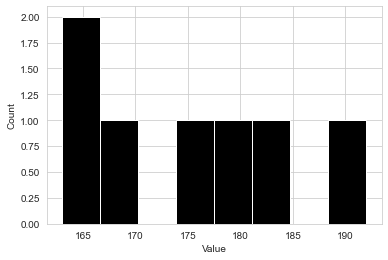

In [565]:
# Create a histogram of the 1st dataset

plt.hist(nd_dataset_a, bins = 8, color = 'black', edgecolor = 'white')
plt.ylabel('Count')
plt.xlabel('Value')
plt.show()

The dataset doesn't seem to be normally distributed as the histogram doesn't produce a bell curve.

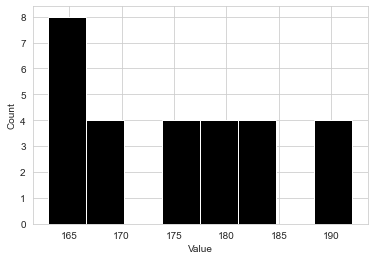

In [566]:
# Create a histogram of the 2nd dataset

plt.hist(nd_dataset_b, bins = 8, color = 'black', edgecolor = 'white')
plt.ylabel('Count')
plt.xlabel('Value')
plt.show()

Nope, still not normally distributed. Lack of bell curve.
The data would be normally distributed if it had more data in the 170-180 area -- and a little less in the 160-165 -- than other areas, since the mean of the dataset is 175,86 and the median is 176.0. (see below)

In [567]:
print(f"Mean: {np.mean(nd_dataset_b):.2f}")
print(f"Median: {np.median(nd_dataset_b):.2f}")

Mean: 175.86
Median: 176.00


#### Normal distribution vol. 2

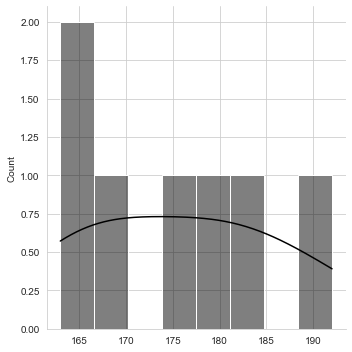

In [568]:
sns.displot(nd_dataset_a, kde = True, bins = 8, color = 'black')

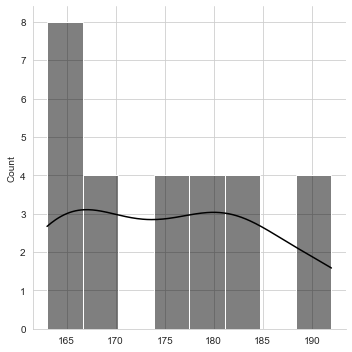

In [569]:
sns.displot(nd_dataset_b, kde = True, bins = 8, color = 'black')

### Confirm hypotheses with the Shapiro-Wilk test
If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution

If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution

In [570]:
print(f"P-value for 1st dataset is: {shapiro(nd_dataset_a).pvalue:.2f}")

P-value for 1st dataset is: 0.82


In [571]:
print(f"P-value for 2nd dataset is: {shapiro(nd_dataset_b).pvalue:.2f}")

P-value for 2nd dataset is: 0.02


### Conclusion

The histograms apparently didn't give such accurate results. The Shapiro Wilk test would argue that the 1st dataset is normally distributed and the 2nd is not. 

#### 4. Density plot (histograms are already done in exc. 3)

<AxesSubplot:ylabel='Density'>

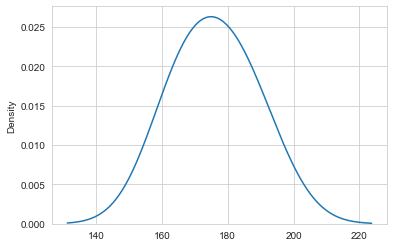

In [572]:
sns.set_style('whitegrid')
sns.kdeplot(nd_dataset_a, bw_method = 1) # bw_method smoothes out the noise; if it were, say, 0.1,  the plot'd
                                         # be way more wobbly since it accounts for variation in data 

<AxesSubplot:ylabel='Density'>

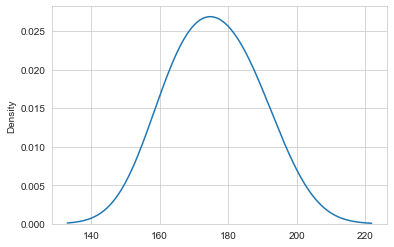

In [573]:
sns.set_style('whitegrid')
sns.kdeplot(nd_dataset_b, bw_method = 1)

### Density plots but with less smoothing

##### 1st dataset

<AxesSubplot:ylabel='Density'>

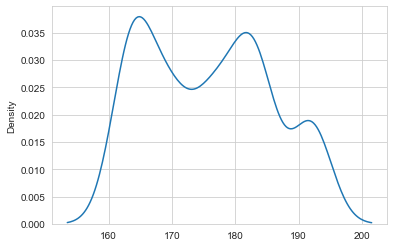

In [611]:
sns.set_style('whitegrid')
sns.kdeplot(nd_dataset_a, bw_method = 0.3)

###### 2nd dataset

<AxesSubplot:ylabel='Density'>

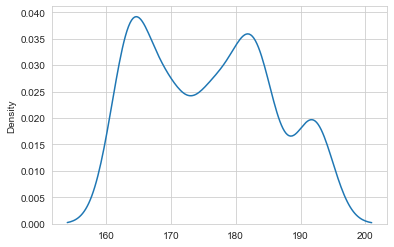

In [575]:
sns.set_style('whitegrid')
sns.kdeplot(nd_dataset_b, bw_method = 0.3)

### Conclusion
Density plots' peaks help to display where values are concentrated. The less the smoothing, bigger the accuracy. 

#### 5. NASA data

In [580]:
# import data
url = 'https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt'
data = pd.read_csv(url, sep = "\s+", skiprows = (0, 1, 2, 3, 4), header = None)
data.columns = ['Year', 'No_Smoothing', 'Lowess(5)']


In [590]:
# verify data
data.head()

,Year,No_Smoothing,Lowess(5)
0,1880,-0.17,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.17
3,1883,-0.18,-0.20
4,1884,-0.28,-0.24


In [582]:
print(f"No_Smoothing mean: {data['No_Smoothing'].mean():.2f}")
print(f"No_Smoothing median: {data['No_Smoothing'].median():.2f}")

No_Smoothing mean: 0.05
No_Smoothing median: -0.07


In [583]:
# Normal distribution with the Shapiro Wilk -test

print(f"P-value for no_smoothing_variable variable is: {shapiro(data['No_Smoothing']).pvalue:.2f}")

P-value for no_smoothing_variable variable is: 0.00


In [584]:
# From 2000's onwards

later_smoothing = data[data['Year'] >= 2000]

In [585]:
# Normal distribution with the Shapiro Wilk -test

print(f"P-value for no_smoothing_variable from 2000 onwards variable is: {shapiro(later_smoothing['No_Smoothing']).pvalue:.2f}")


P-value for no_smoothing_variable from 2000 onwards variable is: 0.22


In [586]:
# Mean and median for 2000's data

print(f"The mean is: {later_smoothing['No_Smoothing'].mean():.2f}")
print(f"The median is: {later_smoothing['No_Smoothing'].median():.2f}")

The mean is: 0.72
The median is: 0.67


#### Conclusion
No_Smoothing with all data is not normally distributed whilst from 2000's onward it is